In [5]:
import numpy as np
import csv

import matplotlib.pyplot as plt
from sklearn.multioutput import MultiOutputClassifier
seed = 1234

In [6]:
train_file = open("./train.csv", 'r')
test_file = open("./test.csv", 'r')
test_labels_file = open("./test_labels.csv", 'r')

reader = csv.reader(train_file)
train = np.array(list(reader))
reader = csv.reader(test_file)
test = np.array(list(reader))
reader = csv.reader(test_labels_file)
test_labels = np.array(list(reader))

In [7]:
X_tr = train[1:, 1]
y_tr = train[1:, 2:]
y_te = test_labels[1:, 1:]
X_te = test[1:, 1]
X_te = X_te[y_te[:, 0] != '-1']
y_te = y_te[y_te[:, 0] != '-1']
print(X_tr.shape)
print(X_te.shape)
print(X_tr.dtype)

(159571,)
(63978,)
<U5000


In [8]:
y_tr = np.where(y_tr == '0', 0, 1)
y_te = np.where(y_te == '0', 0, 1)
print(y_tr.dtype)
print(y_te.dtype)
print(y_tr.shape)
print(y_te.shape)

int64
int64
(159571, 6)
(63978, 6)


In [11]:
labels = train[0, 2:]
print(f"label names: {labels}")
num_labels = len(labels)
for i in range(0, num_labels):
    prop = (y_tr[:, i] == 1).mean()
    print(f"{(prop*100):.4}% comments in the dataset are {labels[i]}")

label names: ['toxic' 'severe_toxic' 'obscene' 'threat' 'insult' 'identity_hate']
9.584% comments in the dataset are toxic
0.9996% comments in the dataset are severe_toxic
5.295% comments in the dataset are obscene
0.2996% comments in the dataset are threat
4.936% comments in the dataset are insult
0.8805% comments in the dataset are identity_hate


In [10]:
"""
mtx = np.zeros((6, 6))

for i in range(0, num_labels):
    subset = y_tr[y_tr[:, i] == '1']
    for j in range(0, num_labels):
        prop = (subset[:, j] == '1').mean()
        mtx[i, j] = prop
        # print(f"{(prop*100):.4} of {labels[i]} are also {labels[j]}")

fig, axes = plt.subplots(1, 1, figsize=(6, 6))
axes.matshow(mtx)
axes.set_xticks(np.arange(6))
axes.set_yticks(np.arange(6))
axes.set_xticklabels(labels);
axes.set_yticklabels(labels);
axes.set_ylabel("If a comment happen to be one these:", fontweight="bold")
axes.set_xlabel("They are also:", fontweight="bold")
axes.xaxis.set_label_position('top')

for (i, j), z in np.ndenumerate(mtx):
    axes.text(j, i, "{:0.2f}%".format(z*100), ha='center', va='center',
              bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))"
"""

'\nmtx = np.zeros((6, 6))\n\nfor i in range(0, num_labels):\n    subset = y_tr[y_tr[:, i] == \'1\']\n    for j in range(0, num_labels):\n        prop = (subset[:, j] == \'1\').mean()\n        mtx[i, j] = prop\n        # print(f"{(prop*100):.4} of {labels[i]} are also {labels[j]}")\n\nfig, axes = plt.subplots(1, 1, figsize=(6, 6))\naxes.matshow(mtx)\naxes.set_xticks(np.arange(6))\naxes.set_yticks(np.arange(6))\naxes.set_xticklabels(labels);\naxes.set_yticklabels(labels);\naxes.set_ylabel("If a comment happen to be one these:", fontweight="bold")\naxes.set_xlabel("They are also:", fontweight="bold")\naxes.xaxis.set_label_position(\'top\')\n\nfor (i, j), z in np.ndenumerate(mtx):\n    axes.text(j, i, "{:0.2f}%".format(z*100), ha=\'center\', va=\'center\',\n              bbox=dict(boxstyle=\'round\', facecolor=\'white\', edgecolor=\'0.3\'))"\n'

In [12]:
LIMIT = len(X_tr)
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer()
vec.fit(X_tr[:LIMIT])
X_tr_vec = vec.transform(X_tr[:LIMIT])
X_te_vec = vec.transform(X_te[:LIMIT])
print(X_tr_vec.shape)
print(X_te_vec.shape)


(159571, 189775)
(63978, 189775)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth=250, min_samples_leaf=2, random_state=seed)
model.fit(X_tr_vec, y_tr[:LIMIT])
pred = model.predict(X_te_vec)
print("Error:", (pred != y_te[:LIMIT]).mean())
print(np.unique(pred))

In [ ]:
"""
from sklearn.svm import SVC

model = MultiOutputClassifier(SVC()).fit(X_tr_vec, y_tr[:LIMIT, :1])
print("Error:", (model.predict(X_te_vec) != y_te[:LIMIT, :1]).mean())
"""

'\nfrom sklearn.svm import SVC\n\nmodel = MultiOutputClassifier(SVC()).fit(X_tr_vec, y_tr[:LIMIT, :1])\nprint("Error:", (model.predict(X_te_vec) != y_te[:LIMIT, :1]).mean())\n'

In [ ]:
"""
from sklearn.naive_bayes import ComplementNB
model = MultiOutputClassifier(ComplementNB()).fit(X_tr_vec, y_tr[:LIMIT])
print("Error:", (model.predict(X_te_vec) != y_te[:LIMIT]).mean())"
"""

'\nfrom sklearn.naive_bayes import ComplementNB\nmodel = MultiOutputClassifier(ComplementNB()).fit(X_tr_vec, y_tr[:LIMIT])\nprint("Error:", (model.predict(X_te_vec) != y_te[:LIMIT]).mean())"\n'

In [ ]:
"""from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier().fit(X_tr_vec, y_tr[:LIMIT])
print("Error:", (model.predict(X_te_vec) != y_te[:LIMIT]).mean())"
"""

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=2, random_state=seed)
model.fit(X_tr_vec, y_tr[:LIMIT])
pred = model.predict(X_te_vec)
print("Error:", (pred != y_te[:LIMIT]).mean())

Error: 0.037233333333333334


In [ ]:
zero_idx = np.where(np.all(y_tr == np.array([0]*6), axis=1))[0]
remove_idx = np.random.choice(zero_idx, size=50000, replace=False)
y_tr_trim = np.delete(y_tr, remove_idx, axis=0)

mask = np.ones(X_tr_vec.shape[0], dtype=bool)
mask[remove_idx] = False
X_tr_trim = X_tr_vec[mask]
print(X_tr_trim.shape)
print(y_tr_trim.shape)
print(np.all(y_tr_trim == 0, axis=1).mean())

(109571, 189775)
(109571, 6)
0.8519224977411907


In [13]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth=250, min_samples_leaf=2, random_state=seed)
model.fit(X_tr_vec, y_tr[:LIMIT])
pred = model.predict(X_te_vec)
print("Error:", (pred != y_te[:LIMIT]).mean())
print(np.unique(pred))

Error: 0.03176091781549908
[0 1]


In [37]:
import skl2onnx
from skl2onnx.common.data_types import FloatTensorType, StringTensorType
vec_onnx = skl2onnx.to_onnx(vec, initial_types=[("input", StringTensorType(None))])
with open("vectorizer.onnx", "wb") as f:
    f.write(vec_onnx.SerializeToString())

model_onnx = skl2onnx.to_onnx(model,
                              initial_types=[("input", FloatTensorType([None, X_tr_vec.shape[1]]))],
                              options={id(model): {"zipmap": False}})
with open("model.onnx", "wb") as f:
    f.write(model_onnx.SerializeToString())

In [34]:
vec.transform(np.array(["hihihii"]))

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 0 stored elements and shape (1, 189775)>

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_te[:LIMIT], pred, target_names = labels)
print(report)
np.unique(pred[:LIMIT,1], return_counts=True)

               precision    recall  f1-score   support

        toxic       0.96      0.24      0.38      6090
 severe_toxic       0.00      0.00      0.00       367
      obscene       0.98      0.18      0.30      3691
       threat       0.00      0.00      0.00       211
       insult       0.98      0.09      0.16      3427
identity_hate       0.00      0.00      0.00       712

    micro avg       0.97      0.16      0.28     14498
    macro avg       0.49      0.08      0.14     14498
 weighted avg       0.88      0.16      0.27     14498
  samples avg       0.02      0.01      0.01     14498



c:\Users\julia\Documents\Workspace\CS178\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\julia\Documents\Workspace\CS178\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\julia\Documents\Workspace\CS178\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} 

(array([0]), array([63978]))

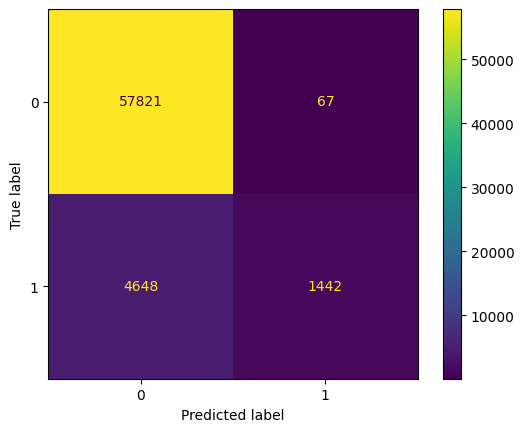

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
mtx = confusion_matrix(y_te[:LIMIT, 0], pred[:, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=mtx)
disp.plot()
plt.show()

In [ ]:
y_tr_trim.shape

(109571, 6)

In [ ]:
from sklearn.metrics import roc_auc_score

pred_prob = model.predict_proba(X_te_vec)
auc_score = roc_auc_score(y_te[:LIMIT], pred_prob[0], average="macro", multi_class="ovr")
print("AUC-ROC Score:", auc_score)

AUC-ROC Score: 0.5140698845356976


In [ ]:
top_features = np.argsort(model.feature_importances_)[-500:]
model.fit(X_tr_vec[:, top_features], y_tr[:LIMIT])

RandomForestClassifier(criterion='entropy', max_depth=90, min_samples_leaf=128,
                       n_estimators=200, random_state=1234)

In [ ]:
print("Error:", (model.predict(X_te_vec[:, top_features]) != y_te[:LIMIT]).mean())

ValueError: X has 36382 features, but RandomForestClassifier is expecting 500 features as input.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
scaler = StandardScaler().fit(X_tr_vec)
X_tr_trans = scaler.transform(X_tr_vec)
X_te_trans = scaler.transform(X_te_vec)

model = MultiOutputClassifier(MLPClassifier(hidden_layer_sizes=(100,), solver="sgd", learning_rate_init=0.01, max_iter=500,
                                            early_stopping=True))
model.fit(X_tr_vec, y_tr[:LIMIT])
print("Error:", (model.predict(X_te_vec) != y_te[:LIMIT]).mean())

Error: 0.037233333333333334


c:\Users\julia\Documents\Workspace\CS178\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\julia\Documents\Workspace\CS178\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\julia\Documents\Workspace\CS178\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} 

               precision    recall  f1-score   support

        toxic       0.00      0.00      0.00       943
 severe_toxic       0.00      0.00      0.00        56
      obscene       0.00      0.00      0.00       565
       threat       0.00      0.00      0.00        37
       insult       0.00      0.00      0.00       511
identity_hate       0.00      0.00      0.00       122

    micro avg       0.00      0.00      0.00      2234
    macro avg       0.00      0.00      0.00      2234
 weighted avg       0.00      0.00      0.00      2234
  samples avg       0.00      0.00      0.00      2234



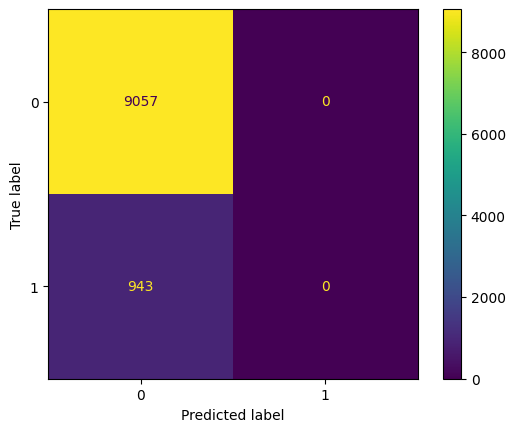

AUC-ROC Score: 0.5203988910629824


In [ ]:
pred = model.predict(X_te_vec)
from sklearn.metrics import classification_report
print(classification_report(y_te[:LIMIT], pred, target_names = labels))
np.unique(y_te[:LIMIT,3], return_counts=True)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
mtx = confusion_matrix(y_te[:LIMIT, 0], pred[:, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=mtx)
disp.plot()
plt.show()
from sklearn.metrics import roc_auc_score
pred_prob = model.predict_proba(X_te_vec)
auc_score = roc_auc_score(y_te[:LIMIT], pred_prob[0], average="macro", multi_class="ovr")
print("AUC-ROC Score:", auc_score)

In [ ]:

def is_all_zero(pred):
    try:
        if len(np.unique(pred)) == 1:
            print("Pred is all zero!")
        else:
            print("It aint")
    except Exception:
        pass

"""
tr_errs = []
va_errs = []
max_depths = np.logspace(2.0, 3.0, num=5)

for max_depth in max_depths:
    print(f"Training depth={max_depth}:")
    model = RandomForestClassifier(n_estimators=100, max_depth=int(max_depth), random_state=seed)
    model.fit(X_tr_vec, y_tr[:LIMIT])
    pred = model.predict(X_te_vec)
    is_all_zero(pred)
    tr_errs.append((model.predict(X_tr_vec) != y_tr[:LIMIT]).mean())
    va_errs.append((pred != y_te[:LIMIT]).mean())

plt.xlabel("max_depth")
plt.ylabel("error")
plt.plot(max_depths, tr_errs, color="blue", label="Training Error")
plt.plot(max_depths, va_errs, color="red", label="Validation Error")
plt.legend()
"""

'\ntr_errs = []\nva_errs = []\nmax_depths = np.logspace(2.0, 3.0, num=5)\n\nfor max_depth in max_depths:\n    print(f"Training depth={max_depth}:")\n    model = RandomForestClassifier(n_estimators=100, max_depth=int(max_depth), random_state=seed)\n    model.fit(X_tr_vec, y_tr[:LIMIT])\n    pred = model.predict(X_te_vec)\n    is_all_zero(pred)\n    tr_errs.append((model.predict(X_tr_vec) != y_tr[:LIMIT]).mean())\n    va_errs.append((pred != y_te[:LIMIT]).mean())\n\nplt.xlabel("max_depth")\nplt.ylabel("error")\nplt.plot(max_depths, tr_errs, color="blue", label="Training Error")\nplt.plot(max_depths, va_errs, color="red", label="Validation Error")\nplt.legend()\n'

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth=250, min_samples_leaf=2)
model.fit(X_tr_vec, y_tr[:LIMIT])
pred = model.predict(X_te_vec)
print("Error:", (pred != y_te[:LIMIT]).mean())
np.unique(pred)

In [ ]:
if True:
    max_depth = max_depths[0]
    print(f"Training depth={max_depth}:")
    model = RandomForestClassifier(n_estimators=100, max_depth=int(max_depth), random_state=seed)
    model.fit(X_tr_vec, y_tr[:LIMIT])
    pred = model.predict(X_te_vec)
    is_all_zero(pred)
    tr_err = (model.predict(X_tr_vec) != y_tr[:LIMIT]).mean()
    print("Tr_err:", tr_err)
    va_err = (pred != y_te[:LIMIT]).mean()
    print("Va_err:", va_err)
    tr_errs.append(tr_err)
    va_errs.append(va_err)
    del pred, model

Training depth=100.0:
Tr_err: 0.0076166666666666666
Va_err: 0.03211666666666667


In [ ]:
if True:
    max_depth = 250
    print(f"Training depth={max_depth}:")
    model = RandomForestClassifier(n_estimators=100, max_depth=int(max_depth), random_state=seed)
    model.fit(X_tr_vec, y_tr[:LIMIT])
    pred = model.predict(X_te_vec)
    is_all_zero(pred)
    tr_err = (model.predict(X_tr_vec) != y_tr[:LIMIT]).mean()
    print("Tr_err:", tr_err)
    va_err = (pred != y_te[:LIMIT]).mean()
    print("Va_err:", va_err)
    tr_errs.append(tr_err)
    va_errs.append(va_err)

Training depth=250:


KeyboardInterrupt: 

In [ ]:
if True:
    max_depth = 350
    print(f"Training depth={max_depth}:")
    model = RandomForestClassifier(n_estimators=100, max_depth=int(max_depth), random_state=seed)
    model.fit(X_tr_vec, y_tr[:LIMIT])
    pred = model.predict(X_te_vec)
    is_all_zero(pred)
    tr_err = (model.predict(X_tr_vec) != y_tr[:LIMIT]).mean()
    print("Tr_err:", tr_err)
    va_err = (pred != y_te[:LIMIT]).mean()
    print("Va_err:", va_err)
    tr_errs.append(tr_err)
    va_errs.append(va_err)

Training depth=350:
Tr_err: 0.00011666666666666667
Va_err: 0.028616666666666665


In [ ]:
if True:
    max_depth = 350
    print(f"Training depth={max_depth}:")
    model = RandomForestClassifier(n_estimators=100, max_depth=int(max_depth), random_state=seed)
    model.fit(X_tr_vec, y_tr[:LIMIT])
    pred = model.predict(X_te_vec)
    is_all_zero(pred)
    tr_err = (model.predict(X_tr_vec) != y_tr[:LIMIT]).mean()
    print("Tr_err:", tr_err)
    va_err = (pred != y_te[:LIMIT]).mean()
    print("Va_err:", va_err)
    tr_errs.append(tr_err)
    va_errs.append(va_err)

Training depth=750:
Tr_err: 6.666666666666667e-05
Va_err: 0.041916666666666665


In [ ]:
if True:
    max_depth = 425
    print(f"Training depth={max_depth}:")
    model = RandomForestClassifier(n_estimators=100, max_depth=int(max_depth), random_state=seed)
    model.fit(X_tr_vec, y_tr[:LIMIT])
    pred = model.predict(X_te_vec)
    is_all_zero(pred)
    tr_err = (model.predict(X_tr_vec) != y_tr[:LIMIT]).mean()
    print("Tr_err:", tr_err)
    va_err = (pred != y_te[:LIMIT]).mean()
    print("Va_err:", va_err)
    tr_errs.append(tr_err)
    va_errs.append(va_err)

Training depth=425:
Tr_err: 0.00011666666666666667
Va_err: 0.029083333333333333


In [ ]:
tr_errs = []
va_errs = []
max_depths = list(range(10, 20))

for max_depth in max_depths:
    model = RandomForestClassifier(n_estimators=200, max_depth=max_depth, min_samples_leaf=pow(2, 7), random_state=seed)
    model.fit(X_tr_vec, y_tr[:LIMIT])
    tr_errs.append((model.predict(X_tr_vec) != y_tr[:LIMIT]).mean())
    va_errs.append((model.predict(X_te_vec) != y_te[:LIMIT]).mean())
    print(f"Completed {max_depth}")

plt.xlabel("max_depth")
plt.ylabel("error")
plt.plot(max_depths, tr_errs, color="blue", label="Training Error")
plt.plot(max_depths, va_errs, color="red", label="Validation Error")
plt.legend()


[np.float64(0.0076166666666666666), np.float64(6.666666666666667e-05), np.float64(0.00013333333333333334), np.float64(0.00011666666666666667), np.float64(6.666666666666667e-05), np.float64(0.00011666666666666667)]
[np.float64(0.03211666666666667), np.float64(0.041916666666666665), np.float64(0.029016666666666666), np.float64(0.028616666666666665), np.float64(0.041916666666666665), np.float64(0.029083333333333333)]


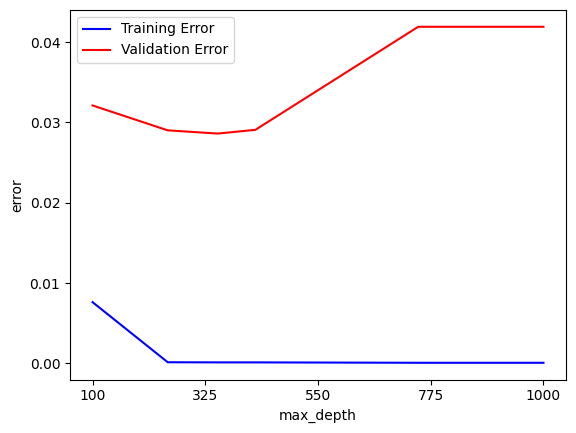

In [ ]:
print(tr_errs)
print(va_errs)
idx = np.array([100, 1000, 250, 350, 750, 425])
TR = np.array(tr_errs)[np.argsort(idx)]
VA = np.array(va_errs)[np.argsort(idx)]
IDX = np.sort(idx)
plt.xlabel("max_depth")
plt.ylabel("error")
plt.xticks(np.linspace(100, 1000, 5))
plt.plot(IDX, TR, color="blue", label="Training Error")
plt.plot(IDX, VA, color="red", label="Validation Error")
plt.legend()


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model = MultiOutputClassifier(GradientBoostingClassifier()).fit(X_tr_vec, y_tr[:LIMIT])
print("Error:", (model.predict(X_te_vec) != y_te[:LIMIT]).mean())

KeyboardInterrupt: 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = MultiOutputClassifier(KNeighborsClassifier()).fit(X_tr_vec, y_tr[:LIMIT])
print("Error:", (model.predict(X_te_vec) != y_te[:LIMIT]).mean())

Error: 0.0361


In [ ]:
pred_zero = np.where(y_te_num == 0, 0, 0)
print("Error:", (pred_zero != y_te_num).mean())

Error: 0.037768191149040814


MemoryError: Unable to allocate 226. GiB for an array with shape (159571, 189775) and data type float64

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = MultiOutputClassifier(KNeighborsClassifier()).fit(X_tr_vec, y_tr[:LIMIT])
pred = model.predict(X_te_vec)
print("Error:", (pred != y_te[:LIMIT]).mean())

Error: 0.0361


c:\Users\julia\Documents\Workspace\CS178\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\julia\Documents\Workspace\CS178\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\julia\Documents\Workspace\CS178\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

               precision    recall  f1-score   support

        toxic       0.50      0.65      0.57       943
 severe_toxic       0.10      0.27      0.15        56
      obscene       0.69      0.42      0.52       565
       threat       0.27      0.08      0.12        37
       insult       0.60      0.34      0.43       511
identity_hate       0.52      0.26      0.35       122

    micro avg       0.52      0.48      0.50      2234
    macro avg       0.45      0.34      0.36      2234
 weighted avg       0.56      0.48      0.50      2234
  samples avg       0.05      0.05      0.05      2234



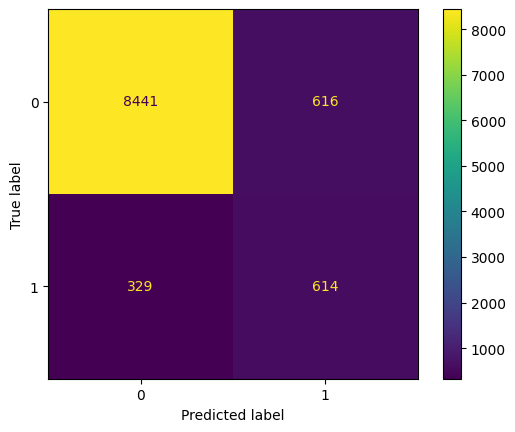

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_te[:LIMIT], pred, target_names = labels))
np.unique(y_te[:LIMIT,3], return_counts=True)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
mtx = confusion_matrix(y_te[:LIMIT, 0], pred[:, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=mtx)
disp.plot()
plt.show()
from sklearn.metrics import roc_auc_score
pred_prob = model.predict_proba(X_te_vec)
auc_score = roc_auc_score(y_te[:LIMIT], pred_prob[0], average="macro", multi_class="ovr")
print("AUC-ROC Score:", auc_score)